
# Farnaz Zinnah
**Homework 1 Question 3: FashionMNIST**
**02/17/2025**



In [1]:
# torch and torchvision are used for building and training the neural network, as well as for loading the FashionMNIST dataset.
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [2]:
a = np. random. rand (2,3)
b = torch. from_numpy (a)
print (a)
print(b)

[[0.007063   0.33694318 0.10139107]
 [0.7454493  0.99969696 0.39900797]]
tensor([[0.0071, 0.3369, 0.1014],
        [0.7454, 0.9997, 0.3990]], dtype=torch.float64)


In [3]:
print(b + 10.0)
print ( )
print (torch. sin(b))
print ( )
print (b. sum())
print()
print (b.mean())
print ( )
print (b. shape)

tensor([[10.0071, 10.3369, 10.1014],
        [10.7454, 10.9997, 10.3990]], dtype=torch.float64)

tensor([[0.0071, 0.3306, 0.1012],
        [0.6783, 0.8413, 0.3885]], dtype=torch.float64)

tensor(2.5896, dtype=torch.float64)

tensor(0.4316, dtype=torch.float64)

torch.Size([2, 3])


In [4]:
torch. cuda. is_available()

True

In [5]:
!nvidia-smi

Thu Feb 20 15:11:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
a = torch. rand (1,1, requires_grad=True)
b = torch. rand (1,1)
y = a + b
print("a:", a)
print("b:", b)
print("y:", y)

a: tensor([[0.0354]], requires_grad=True)
b: tensor([[0.0401]])
y: tensor([[0.0755]], grad_fn=<AddBackward0>)


In [7]:
y.backward()
print("dy/da:", a.grad)

dy/da: tensor([[1.]])


In [8]:
a = torch. rand (1,1, requires_grad=True)
b = torch. rand (1,1)
y = a**2 * b
print("a:"
, a)
print("b:"
, b)
print("y:", y)
y. backward()
print ("dy/da:"
, a. grad)
print("dy/da:", 2 * a * b)

a: tensor([[0.8676]], requires_grad=True)
b: tensor([[0.6890]])
y: tensor([[0.5187]], grad_fn=<MulBackward0>)
dy/da: tensor([[1.1956]])
dy/da: tensor([[1.1956]], grad_fn=<MulBackward0>)


In [9]:
A = torch. rand (2,2)
b = torch. rand (2,1)
x = torch. rand (2,1, requires_grad=True)
y = torch.matmul(A, x) + b
z = y.sum( )
print(z)

tensor(2.0313, grad_fn=<SumBackward0>)


In [10]:
z.backward()

In [11]:
print("dz/dx:", x.grad)

dz/dx: tensor([[0.7450],
        [1.4380]])


In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Steps to do below:


*   Convert images to tensors
*   Load the FashionMNIST dataset
*   Create DataLoaders for training and testing (using a batch size of 64)


In [13]:
transform = transforms.ToTensor()


In [14]:
train_dataset = torchvision.datasets.FashionMNIST(root='./FashionMNIST', train=True, download=True, transform=transform)
test_dataset  = torchvision.datasets.FashionMNIST(root='./FashionMNIST', train=False, download=True, transform=transform)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.8MB/s]


Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]


Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.73MB/s]


Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 12.6MB/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



In [15]:
print(len(train_dataset))
print(len(test_dataset))

60000
10000


In [16]:
image, label = train_dataset[0]
print (image.shape, label)

torch.Size([1, 28, 28]) 9


In [17]:
print(image.squeeze().shape)

torch.Size([28, 28])


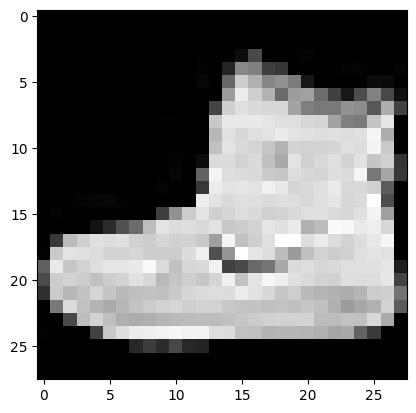

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image. squeeze(), cmap=plt.cm.gray)

In [50]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [51]:
print(len(train_loader))
print(len(test_loader))

938
157


In [52]:
print(len(train_loader)*64)
print(len(test_loader)*64)

60032
10048


In [53]:
images, labels = next(iter(train_loader))
print (images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


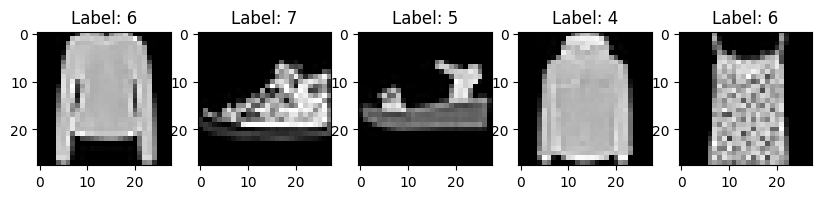

In [54]:
plt.figure(figsize=(10,4) )
for i in range(5):
  plt.subplot(1,5, i+1)
  plt.title(f'Label: {labels[i].item()}')
  plt.imshow(images[i].squeeze(), cmap=plt.cm.gray)

We have to do the following:


*   Flatten the 28x28 image to a vector of 784 features
*   First hidden layer: 256 neurons
*   Second hidden layer: 128 neurons
*   Third hidden layer: 64 neurons
*   Applying ReLU for each layer
*   10 output neurons for 10 classes
*   ReLU activation for hidden layers
*   Output logits (no softmax here)


In [81]:
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

**`Logistic regression only applies a linear transformation, meaning it struggles with complex relationships in image data. A neural network with hidden layers allows the model to learn hierarchical features—patterns like edges, textures, and shapes.`**

Instantiate the model and move it to the device (GPU if available)

In [82]:
model = FashionMNISTModel().to(device)

Cross-entropy loss for classification:

In [83]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4) # Adam because in deep neural network with multiple hidden layers it is helpful, because it adjusts learning rates automatically for faster convergence

In [84]:
!nvidia-smi

Thu Feb 20 15:43:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   77C    P0             31W /   70W |     164MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Training settings

In [85]:
num_epochs = 20
train_loss_history = []
test_loss_history = []

Training the Model and Computing Train & Test Loss Curves

In [86]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)         # Forward pass
        loss = criterion(outputs, labels)
        loss.backward()                 # Backward pass (compute gradients)
        optimizer.step()                # Update the weights

        running_loss += loss.item() * images.size(0)

    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_loss_history.append(epoch_train_loss)

    # Evaluate on the test set
    model.eval()  # Set model to evaluation mode
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_test_loss = test_loss / len(test_loader.dataset)
    test_loss_history.append(epoch_test_loss)
    accuracy = 100 * correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

Epoch [1/20], Train Loss: 0.6816, Test Loss: 0.4550, Test Accuracy: 83.53%
Epoch [2/20], Train Loss: 0.4603, Test Loss: 0.4110, Test Accuracy: 85.24%
Epoch [3/20], Train Loss: 0.4192, Test Loss: 0.3943, Test Accuracy: 85.79%
Epoch [4/20], Train Loss: 0.3967, Test Loss: 0.3857, Test Accuracy: 86.21%
Epoch [5/20], Train Loss: 0.3868, Test Loss: 0.3678, Test Accuracy: 86.71%
Epoch [6/20], Train Loss: 0.3739, Test Loss: 0.3564, Test Accuracy: 87.24%
Epoch [7/20], Train Loss: 0.3658, Test Loss: 0.3698, Test Accuracy: 86.50%
Epoch [8/20], Train Loss: 0.3538, Test Loss: 0.3555, Test Accuracy: 87.09%
Epoch [9/20], Train Loss: 0.3517, Test Loss: 0.3569, Test Accuracy: 87.17%
Epoch [10/20], Train Loss: 0.3468, Test Loss: 0.3517, Test Accuracy: 87.20%
Epoch [11/20], Train Loss: 0.3389, Test Loss: 0.3624, Test Accuracy: 86.68%
Epoch [12/20], Train Loss: 0.3372, Test Loss: 0.3367, Test Accuracy: 87.41%
Epoch [13/20], Train Loss: 0.3312, Test Loss: 0.3351, Test Accuracy: 87.62%
Epoch [14/20], Train 

Plot the training and test loss curves

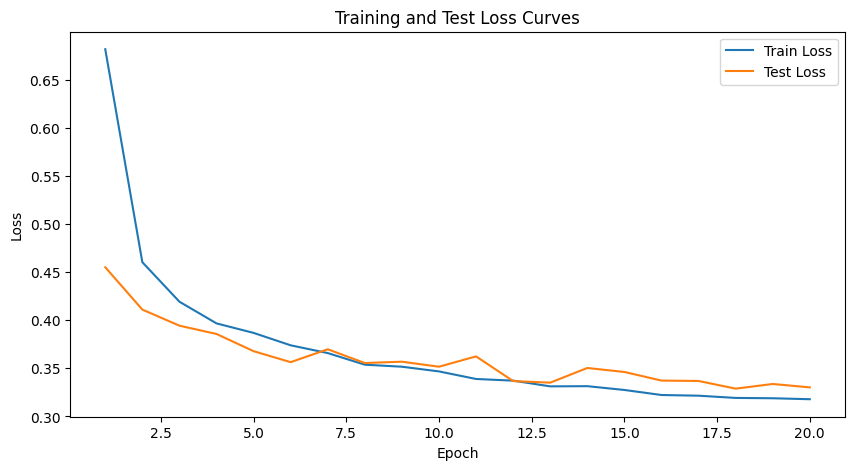

In [87]:
plt.figure(figsize=(10,5))
plt.plot(range(1, num_epochs+1), train_loss_history, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_loss_history, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curves')
plt.legend()
plt.show()

**`From the plot we see that the train loss decreases and the test loss stays low, meaning the model is learning well.`**

In [88]:
print(images.shape, labels.shape)

torch.Size([16, 1, 28, 28]) torch.Size([16])




*   Visualize predictions on 3 random test samples
*   Get one batch of test images
*   Convert logits to probabilities





In [89]:
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
outputs = model(images)
probs = torch.softmax(outputs, dim=1)

In [90]:
print(outputs.shape)

torch.Size([64, 10])


In [91]:
predicted_labels = torch.max(outputs, 1)[1]
print ("Predicted:", predicted_labels)
print("True Labels:", labels)

Predicted: tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 7, 7, 5,
        1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7, 6, 7, 2, 1,
        2, 6, 4, 2, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5], device='cuda:0')
True Labels: tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1,
        2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5], device='cuda:0')


Text(0.5, 1.0, 'Pred: 7, True: 7')

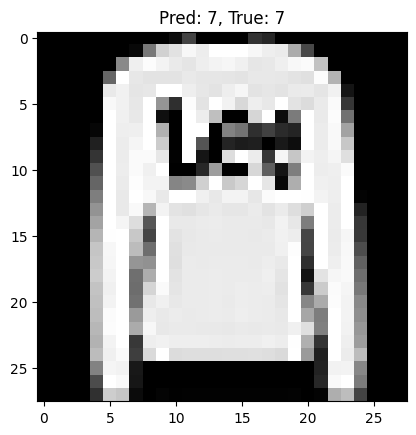

In [92]:
plt.imshow(images[1].squeeze().cpu(), cmap=plt.cm.gray)
plt.title(f'Pred: {predicted_labels[12].item()}, True: {labels[12].item()}')

Randomly select 3 indices from this batch

In [93]:
indices = np.random.choice(range(images.shape[0]), 3, replace=False)

Plot each selected image with its predicted class probabilities


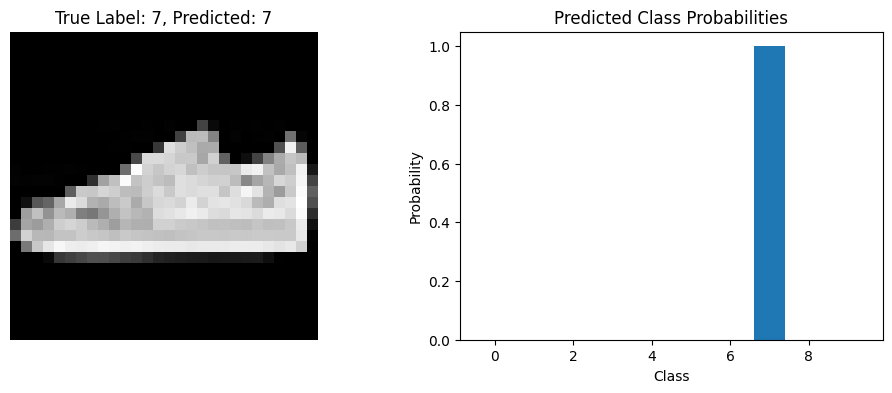

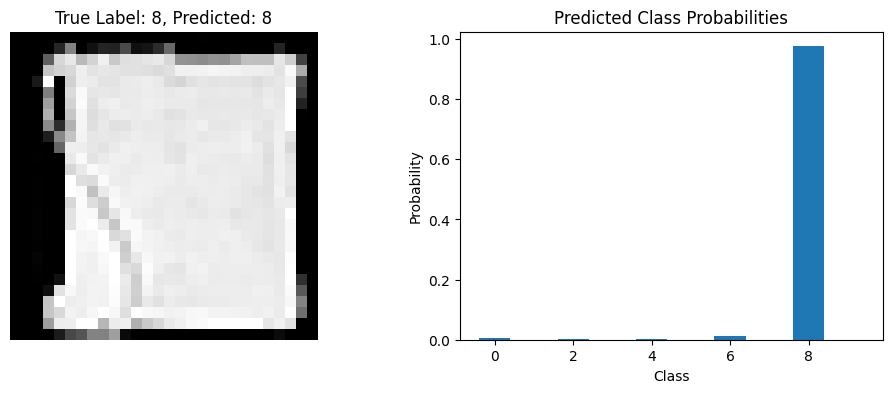

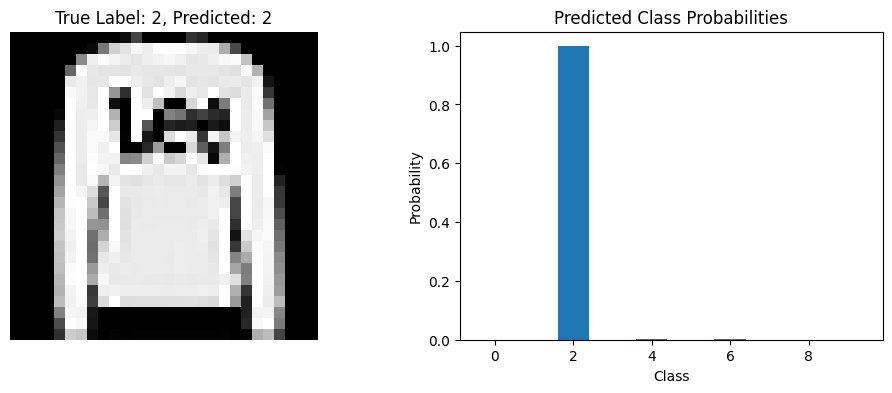

In [94]:
for idx in indices:
    img = images[idx].cpu().squeeze()
    prob = probs[idx].detach().cpu().numpy()
    predicted_class = np.argmax(prob)

    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True Label: {labels[idx].item()}, Predicted: {predicted_class}")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.bar(range(10), prob)
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.title('Predicted Class Probabilities')
    plt.show()

**`The model is very confident with its predictions, but with a few misclassifications.`**